In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
#PREPROCESSING

___1)Replace the NaN values with correct value.___

In [4]:
dataset.isna().sum() #same as isnull. Gives same result.

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
'''
The output shows salary has 67 missing values (NaNs), while other columns are clean.

Best Replacement Strategy:
    Since salary is only applicable to 'Placed' students, it's wrong to impute salary for 'Not Placed' ones.

    Step-by-step handling:
        Set salary = 0 for all 'Not Placed' students:    
            Because they did not receive a job offer, so salary logically doesn’t apply.
        
        Impute missing salary for 'Placed' students only
            For those:
            Use median salary of other placed students — it’s robust against outliers (unlike mean).
            
        | Criteria               | Mean        | Median    |
        | ---------------------- | ----------- | --------- |
        | Sensitive to outliers? | ✅ Yes       | ❌ No      |
        | More representative?   | ❌ Sometimes | ✅ Usually |

        In placement data, some students get very high packages (e.g., ₹20 LPA) — that skews the mean.

Final Justification:

| Case         | Action          | Justification                         |
| ------------ | --------------- | ------------------------------------- |
| Not Placed   | salary = 0      | No job offered, salary irrelevant     |
| Placed + NaN | salary = median | Median avoids skewing due to outliers |

'''

"\nThe output shows salary has 67 missing values (NaNs), while other columns are clean.\n\nBest Replacement Strategy:\n    Since salary is only applicable to 'Placed' students, it's wrong to impute salary for 'Not Placed' ones.\n\n    Step-by-step handling:\n        Set salary = 0 for all 'Not Placed' students:    \n            Because they did not receive a job offer, so salary logically doesn’t apply.\n        \n        Impute missing salary for 'Placed' students only\n            For those:\n            Use median salary of other placed students — it’s robust against outliers (unlike mean).\n            \n        | Criteria               | Mean        | Median    |\n        | ---------------------- | ----------- | --------- |\n        | Sensitive to outliers? | ✅ Yes       | ❌ No      |\n        | More representative?   | ❌ Sometimes | ✅ Usually |\n\n        In placement data, some students get very high packages (e.g., ₹20 LPA) — that skews the mean.\n\nFinal Justification:\n\n| Ca

In [6]:
# Check how many 'Placed' students have missing (NaN) salary
missing_salary_placed = dataset[(dataset['status'] == 'Placed') & (dataset['salary'].isna())]

# Show count
print(f"Number of 'Placed' students with missing salary: {missing_salary_placed.shape[0]}")


Number of 'Placed' students with missing salary: 0


In [7]:
#From this above Code we get to know that only 'Not Placed' columns have NaN Values. so that Fill wit 0.

In [8]:
dataset.fillna(0, inplace=True)

In [9]:
# fillna(0): Replaces all NaN (missing) values in the dataset with 0.
# inplace=True: Modifies the dataset in place, meaning it directly updates the original dataset rather than returning a new DataFrame.

In [10]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [11]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
#Therefore, all the null values are replaced.

In [13]:
dataset = dataset.drop('sl_no', axis=1)
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [14]:
#Find and Replace Outliers

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from Univariate import Univariate
quan, qual = Univariate.quanQual(dataset)
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [17]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [18]:
descriptive = Univariate.descriptive_Univariate(dataset, quan)
descriptive

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Q1:25%,60.6,60.9,61.0,60.0,57.945,0.0
Q2:50%,67.0,65.0,66.0,71.0,62.0,240000.0
Q3:75%,75.7,73.0,72.0,83.5,66.255,282500.0
99%,87.0,91.86,83.86,97.0,76.1142,629000.0
Q4:100%,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5Rule,22.65,18.15,16.5,35.25,12.465,423750.0


In [19]:
Lesser, Greater = Univariate.FindOutliers(descriptive, quan)
Lesser, Greater

(['hsc_p'], ['hsc_p', 'degree_p', 'salary'])

In [20]:
#Replace Outliers
dataset = Univariate.ReplaceOutliers(dataset, descriptive, Lesser, Greater)
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [21]:
descriptive = Univariate.descriptive_Univariate(dataset, quan)
descriptive

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.303395,66.334744,66.358558,72.100558,62.278186,197615.116279
Median,67.0,65.0,66.0,71.0,62.0,240000.0
Mode,62.0,63.0,65.0,60.0,56.7,0.0
Q1:25%,60.6,60.9,61.0,60.0,57.945,0.0
Q2:50%,67.0,65.0,66.0,71.0,62.0,240000.0
Q3:75%,75.7,73.0,72.0,83.5,66.255,282500.0
99%,87.0,91.129,83.86,97.0,76.1142,629000.0
Q4:100%,89.4,91.15,88.5,98.0,77.89,706250.0
IQR,15.1,12.1,11.0,23.5,8.31,282500.0
1.5Rule,22.65,18.15,16.5,35.25,12.465,423750.0


In [22]:
Lesser, Greater = Univariate.FindOutliers(descriptive, quan)
Lesser, Greater

([], [])

In [23]:
#Here, Outliers are replaced

In [24]:
df=dataset[quan] #Final quantitatuve Data with replaced NaN values and Outliers
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [25]:
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [26]:
#Save into csv file
dataset.to_csv("Preprocessed_Placementdata.csv", index=False)

___2)How many of them are not placed?___

In [27]:
# Count the number of students with status 'Not Placed'
not_placed_count = dataset[dataset['status'] == 'Not Placed'].shape[0]
print(f"Number of students who are Not Placed: {not_placed_count}")

Number of students who are Not Placed: 67


In [28]:
#dataset['status'] == 'Not Placed' filters the rows.
#.shape[0] gives the number of such rows (i.e., the count).

____3)Find the reason for non placement from the dataset?____

In [29]:
# Filter non-placed and placed students
not_placed = dataset[dataset['status'] == 'Not Placed']
placed = dataset[dataset['status'] == 'Placed']

# Compare average scores of placed and not placed students
comparison = pd.DataFrame({'Placed Average' : placed.mean(numeric_only=True), 'Not Placed Average' : not_placed.mean(numeric_only=True)})

print("\n Average Score Comparison ")
print(comparison)


 Average Score Comparison 
          Placed Average  Not Placed Average
ssc_p          71.721486           57.544030
hsc_p          69.837027           58.598358
degree_p       68.723649           61.134179
etest_p        73.238041           69.587910
mba_p          62.579392           61.612836
salary     287076.013514            0.000000


In [30]:
'''
Reason for Non-Placement:
    
    Low Academic Performance:    
        Not Placed students have consistently lower average marks in SSC, HSC, and Degree.    
        e.g., SSC difference = 71.27 - 57.54 ≈ 13.7% lower
    
    Low MBA Scores:
        Although the difference is small, placed students have slightly higher MBA percentage.
   
    Lower E-test Performance:
        The employability test score (etest_p) is a bit lower for Not Placed students, which may impact employability evaluations.
    
    Salary is 0 for Not Placed:
        Confirms they did not receive any job offers.

    Conclusion:
        Students who were not placed generally had significantly lower scores in their SSC, HSC, and degree percentages, 
        along with slightly lower MBA and employability test scores. 
        This suggests that overall academic performance and test scores are key reasons for non-placement.
'''

'\nReason for Non-Placement:\n    \n    Low Academic Performance:    \n        Not Placed students have consistently lower average marks in SSC, HSC, and Degree.    \n        e.g., SSC difference = 71.27 - 57.54 ≈ 13.7% lower\n    \n    Low MBA Scores:\n        Although the difference is small, placed students have slightly higher MBA percentage.\n   \n    Lower E-test Performance:\n        The employability test score (etest_p) is a bit lower for Not Placed students, which may impact employability evaluations.\n    \n    Salary is 0 for Not Placed:\n        Confirms they did not receive any job offers.\n\n    Conclusion:\n        Students who were not placed generally had significantly lower scores in their SSC, HSC, and degree percentages, \n        along with slightly lower MBA and employability test scores. \n        This suggests that overall academic performance and test scores are key reasons for non-placement.\n'

____4)What kind of relation between salary and mba_p____

 1. Scatter Plot: Visual Insight
    A scatter plot is ideal for understanding the relationship between two continuous (numeric) variables.
    
    Why?
    
    It visually shows the pattern or trend between variables.
    
    You can spot:
    
    Positive trend (as mba_p increases, salary increases)
    
    Negative trend (as mba_p increases, salary decreases)
    
    No trend (no clear relation)
    
    It also highlights outliers (unusual points).
    
    🟢 Conclusion: The scatter plot gives a quick and intuitive visual understanding of how salary behaves with respect to MBA percentage.

✅ 2. Correlation Coefficient: Quantitative Strength of Relationship Why?

    The Pearson correlation coefficient measures the strength and direction of a linear relationship between two numeric variables.
    
    It ranges from:
    
    +1 (perfect positive linear relationship)
    
    0 (no linear relationship)
    
    –1 (perfect negative linear relationship)
    
    Helps validate what the scatter plot shows, but with an exact number.

🧠 Conclusion: Correlation gives an objective numerical value to support what we observe visually in the scatter plot.

💡 When used together:
    Using both scatter plot and correlation provides a complete picture — visual + statistical — to understand the relationship between mba_p and salary.

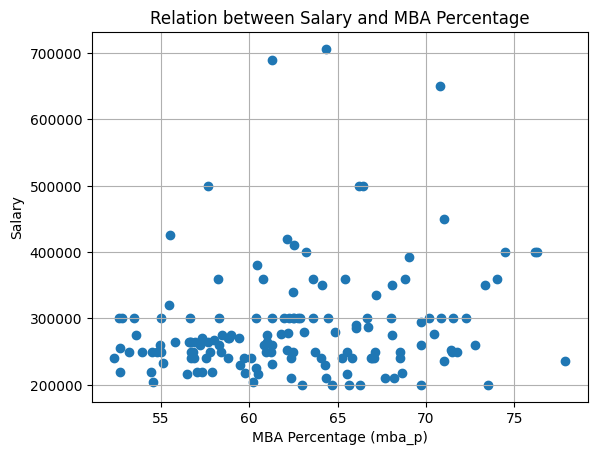

In [31]:
#Visual Analysis using Scatter Plot
import matplotlib.pyplot as plt

plt.scatter(placed['mba_p'], placed['salary']) # Take only placed students to avoid salary = 0
plt.xlabel('MBA Percentage (mba_p)')
plt.ylabel('Salary')
plt.title('Relation between Salary and MBA Percentage')
plt.grid(True)
plt.show()

In [32]:
# Correlation between salary and mba_p for placed students
correlation = placed['mba_p'].corr(placed['salary'])
print("Correlation between MBA percentage and Salary:", correlation)

Correlation between MBA percentage and Salary: 0.18937570331014741


In [33]:
'''
If correlation ≈ +1 → Strong positive relationship (higher MBA %, higher salary)
If correlation ≈ 0 → No linear relationship
If correlation ≈ -1 → Strong negative relationship (unlikely in this case
'''

'\nIf correlation ≈ +1 → Strong positive relationship (higher MBA %, higher salary)\nIf correlation ≈ 0 → No linear relationship\nIf correlation ≈ -1 → Strong negative relationship (unlikely in this case\n'

____Final Interpretation: Relationship between Salary and MBA Percentage:____

Based on the scatter plot and correlation result:

Scatter Plot Insights:

    The points are widely spread out and do not follow a clear upward trend, which confirms that:
    MBA percentage alone does not strongly predict the salary.        
    Some students with lower mba_p still received higher salaries, likely due to other factors (e.g., etest_p, work experience, degree type).

Correlation Coefficient = 0.189

    This indicates a weak positive linear relationship between mba_p (MBA percentage) and salary.
    In other words, as MBA percentage increases, salary tends to increase slightly, but the relationship is not strong or consistent.

Final Conclusion:

    There is a weak positive relationship between MBA percentage and salary, meaning that a higher MBA score might help in getting a better salary,
    but it is not a strong determining factor.

____5)Which specialization is getting minimum salary?____

In [34]:
# Group by specialisation and find the minimum salary
min_salary_by_specialisation = placed.groupby('specialisation')['salary'].min()

print("Minimum salary by specialisation:")
print(min_salary_by_specialisation)


Minimum salary by specialisation:
specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64


___Result:___

    Both Mkt&Fin and Mkt&HR have the same minimum salary of ₹200,000 among the placed students.
    This suggests that specialisation does not significantly influence the minimum salary offered.
    The minimum salary appears to be a common base salary level, possibly offered by entry-level recruiters across specialisations.

____6)How many of them getting above 500000 salary?____

In [35]:
# Filter students with salary > 500000
high_salary = placed[placed['salary'] > 500000]

# Count how many students have salary above 500000
count = high_salary.shape[0]

print(f"Number of students with salary above ₹500,000: {count}")

Number of students with salary above ₹500,000: 3


___Result:___

    3 students are getting salary above 500000

____7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)____

In [36]:
'''
One-Way ANOVA between etest_p and mba_p:

Hypotheses:
    Null Hypothesis (H₀): There is no significant difference in the average scores between etest_p and mba_p.
    Alternative Hypothesis (H₁): There is a significant difference between the means of etest_p and mba_p.

Interpretation Strategy:
    If p-value < 0.05 → The difference is statistically significant.
    If p-value ≥ 0.05 → The difference is not statistically significant.
'''

'\nOne-Way ANOVA between etest_p and mba_p:\n\nHypotheses:\n    Null Hypothesis (H₀): There is no significant difference in the average scores between etest_p and mba_p.\n    Alternative Hypothesis (H₁): There is a significant difference between the means of etest_p and mba_p.\n\nInterpretation Strategy:\n    If p-value < 0.05 → The difference is statistically significant.\n    If p-value ≥ 0.05 → The difference is not statistically significant.\n'

In [37]:
from scipy.stats import f_oneway
# Apply one-way ANOVA
anova_result = f_oneway(dataset['etest_p'], dataset['mba_p'])
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Reject the Null Hypothesis: Significant difference exists between etest_p and mba_p")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference between etest_p and mba_p")

F-statistic: 98.64487057324706
p-value: 4.672547689133573e-21
Reject the Null Hypothesis: Significant difference exists between etest_p and mba_p


____8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.
(Makedecision using Hypothesis Testing)____

In [38]:
#Independent Sample - Unpaired T-Test
from scipy.stats import ttest_ind

# Filter only placed students to ensure salary is non-zero
SciandTech= placed[placed['degree_t']=='Sci&Tech']['salary']
MktandHR= placed[placed['specialisation']=='Mkt&HR']['salary']
t_stat, p_value = ttest_ind(SciandTech, MktandHR)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.734391160944239
P-value: 0.007496896218767113


In [39]:
# Decision
if p_value < 0.05:
    print("Reject H₀: Significant difference in salary between the two groups, degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary.")
else:
    print("Fail to reject H₀: No significant difference in salary between the two groups, degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary.")

Reject H₀: Significant difference in salary between the two groups, degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary.


In [40]:
'''
Conclusion:
    There is a statistically significant difference in salary between students with:
    A Sci&Tech degree
    And those specialized in Mkt&HR
    This means the two groups do not have similar salary distributions — their average salaries differ significantly.
'''

'\nConclusion:\n    There is a statistically significant difference in salary between students with:\n    A Sci&Tech degree\n    And those specialized in Mkt&HR\n    This means the two groups do not have similar salary distributions — their average salaries differ significantly.\n'

____9)Convert the normal distribution to standard normal distribution for salary column____

In [41]:
import seaborn as sns

<Axes: xlabel='salary', ylabel='Density'>

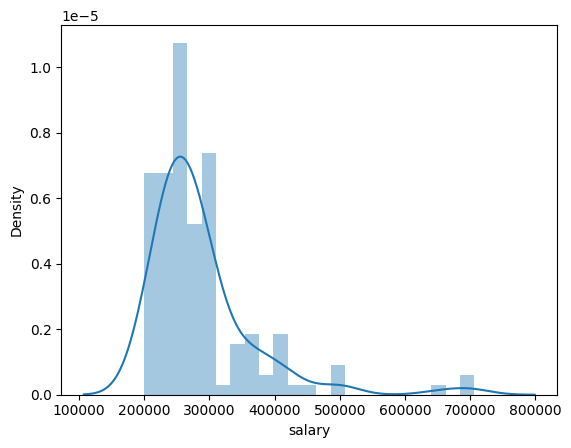

In [42]:
#Normal Distribution
sns.distplot(placed["salary"])

In [43]:
## Coverting Normal Distribution into standard Normal Distribution
def stdNBgraph(placed):
        
    import seaborn as sns
    mean=placed.mean()
    std=placed.std()

    values=[i for i in placed]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    print(f"{sum(z_score)/len(z_score) : .2f}")
    

 0.00


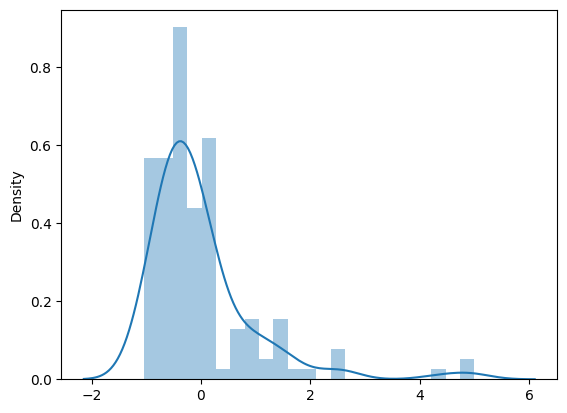

In [44]:
stdNBgraph(placed["salary"])

In [45]:
'''
Interpretation:
    We convert normal data to standard normal to compare, compute probabilities, detect outliers, and ensure fair input to statistical or ML models.
'''    

'\nInterpretation:\n    We convert normal data to standard normal to compare, compute probabilities, detect outliers, and ensure fair input to statistical or ML models.\n'

____10)What is the probability Density Function of the salary range from 700000 to 900000?____

In [46]:
#Probability Density Function
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=287076.014, Standard Deviation=83857.172
The area between range(700000,900000):4.236856276404019e-07


4.236856276404019e-07

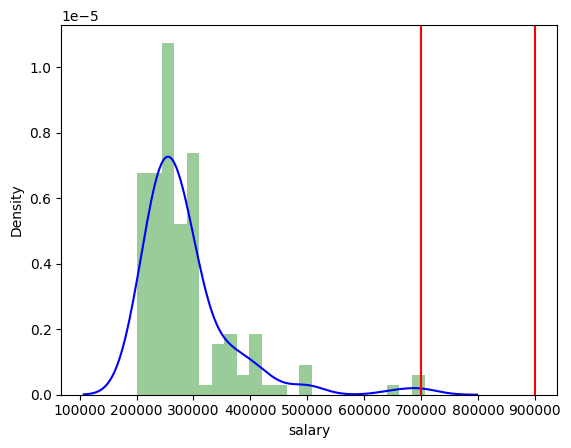

In [47]:
get_pdf_probability(placed["salary"],700000,900000)

In [48]:
'''
Interpretation:
    The probability of a placed student earning between ₹700,000 and ₹900,000 is extremely low, confirming that 
    very high salaries are outliers in this dataset. Most students are concentrated around lower salary ranges near the mean (~₹287K).
'''

'\nInterpretation:\n    The probability of a placed student earning between ₹700,000 and ₹900,000 is extremely low, confirming that \n    very high salaries are outliers in this dataset. Most students are concentrated around lower salary ranges near the mean (~₹287K).\n'

____11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hy-pothesis Testing)____

In [49]:
'''
Comparing two related scores (etest_p and mba_p) for the same group of students.
This is a classic case for a paired (dependent) t-test.

Step-by-Step: Paired Sample t-test:

Hypotheses:
    H₀ (Null Hypothesis): There is no significant difference between etest_p and mba_p for Sci&Tech students.
    
    H₁ (Alternative Hypothesis): There is a significant difference between etest_p and mba_p for Sci&Tech students.
'''

'\nComparing two related scores (etest_p and mba_p) for the same group of students.\nThis is a classic case for a paired (dependent) t-test.\n\nStep-by-Step: Paired Sample t-test:\n\nHypotheses:\n    H₀ (Null Hypothesis): There is no significant difference between etest_p and mba_p for Sci&Tech students.\n    \n    H₁ (Alternative Hypothesis): There is a significant difference between etest_p and mba_p for Sci&Tech students.\n'

In [50]:
#Dependent Sample - paired T-Test
from scipy.stats import ttest_rel

# Filter students with degree_t = 'Sci&Tech'
sci_tech = dataset[dataset['degree_t'] == 'Sci&Tech']

# Perform paired t-test
t_stat, p_val = ttest_rel(sci_tech['etest_p'], sci_tech['mba_p'])

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Decision at 5% significance level
if p_val < 0.05:
    print("Reject H₀: Significant difference between etest_p and mba_p for Sci&Tech students")
else:
    print("Fail to reject H₀: No significant difference between etest_p and mba_p for Sci&Tech students")

T-statistic: 5.0049844583693615
P-value: 5.517920600505392e-06
Reject H₀: Significant difference between etest_p and mba_p for Sci&Tech students


In [ ]:
'''
Interpretation Strategy:
    p-value < 0.05 → difference is statistically significant → reject H₀.
    
    p-value ≥ 0.05 → no significant difference → fail to reject H₀.
'''

____12)Which parameter is highly correlated with salary?____

In [ ]:
'''
The highest positive correlation value (next to salary = 1.0 itself) tells which parameter is most positively associated with salary.

    If correlation is close to +1 → strong positive relationship
    
    If correlation is close to –1 → strong negative relationship
    
    If correlation is near 0 → no linear relationship
'''

In [51]:
# Compute correlation of all numeric columns with salary
correlations = placed.corr(numeric_only=True)['salary'].sort_values(ascending=False)

print("Correlation of features with salary:")
print(correlations)

Correlation of features with salary:
salary      1.000000
mba_p       0.189376
etest_p     0.185707
hsc_p       0.068105
ssc_p       0.063137
degree_p   -0.008664
Name: salary, dtype: float64


In [ ]:
'''
Result:

    The parameter mba_p (MBA percentage) has the highest positive correlation (≈ 0.189) with salary among all features.

    etest_p (Employability Test Score) is closely behind, with a correlation of 0.1857.

    Other parameters like hsc_p, ssc_p, and degree_p show very weak or no correlation with salary.

    degree_p even has a slightly negative correlation, indicating no positive salary advantage with a higher degree percentage in this dataset.

Conclusion:
    The parameter most strongly associated with higher salary is mba_p, meaning students with higher MBA percentages tend to earn better salaries, 
    although the correlation is still weak (below 0.2).
    
    In real-world terms, this suggests academic performance alone may not be a strong predictor of salary, 
    and other factors (like skills, interview performance, etc.) likely play a big role.    



____13) plot any useful graph and explain it____

In [ ]:
'''
What is a Pairplot?
    A pairplot from Seaborn creates a grid of scatter plots for all numeric combinations of features — with optional histograms or density plots on the diagonal.
    
    It helps you:
    
    Visualize relationships between multiple variables at once
    
    Detect patterns and correlations
    
    Spot clusters or outliers
'''

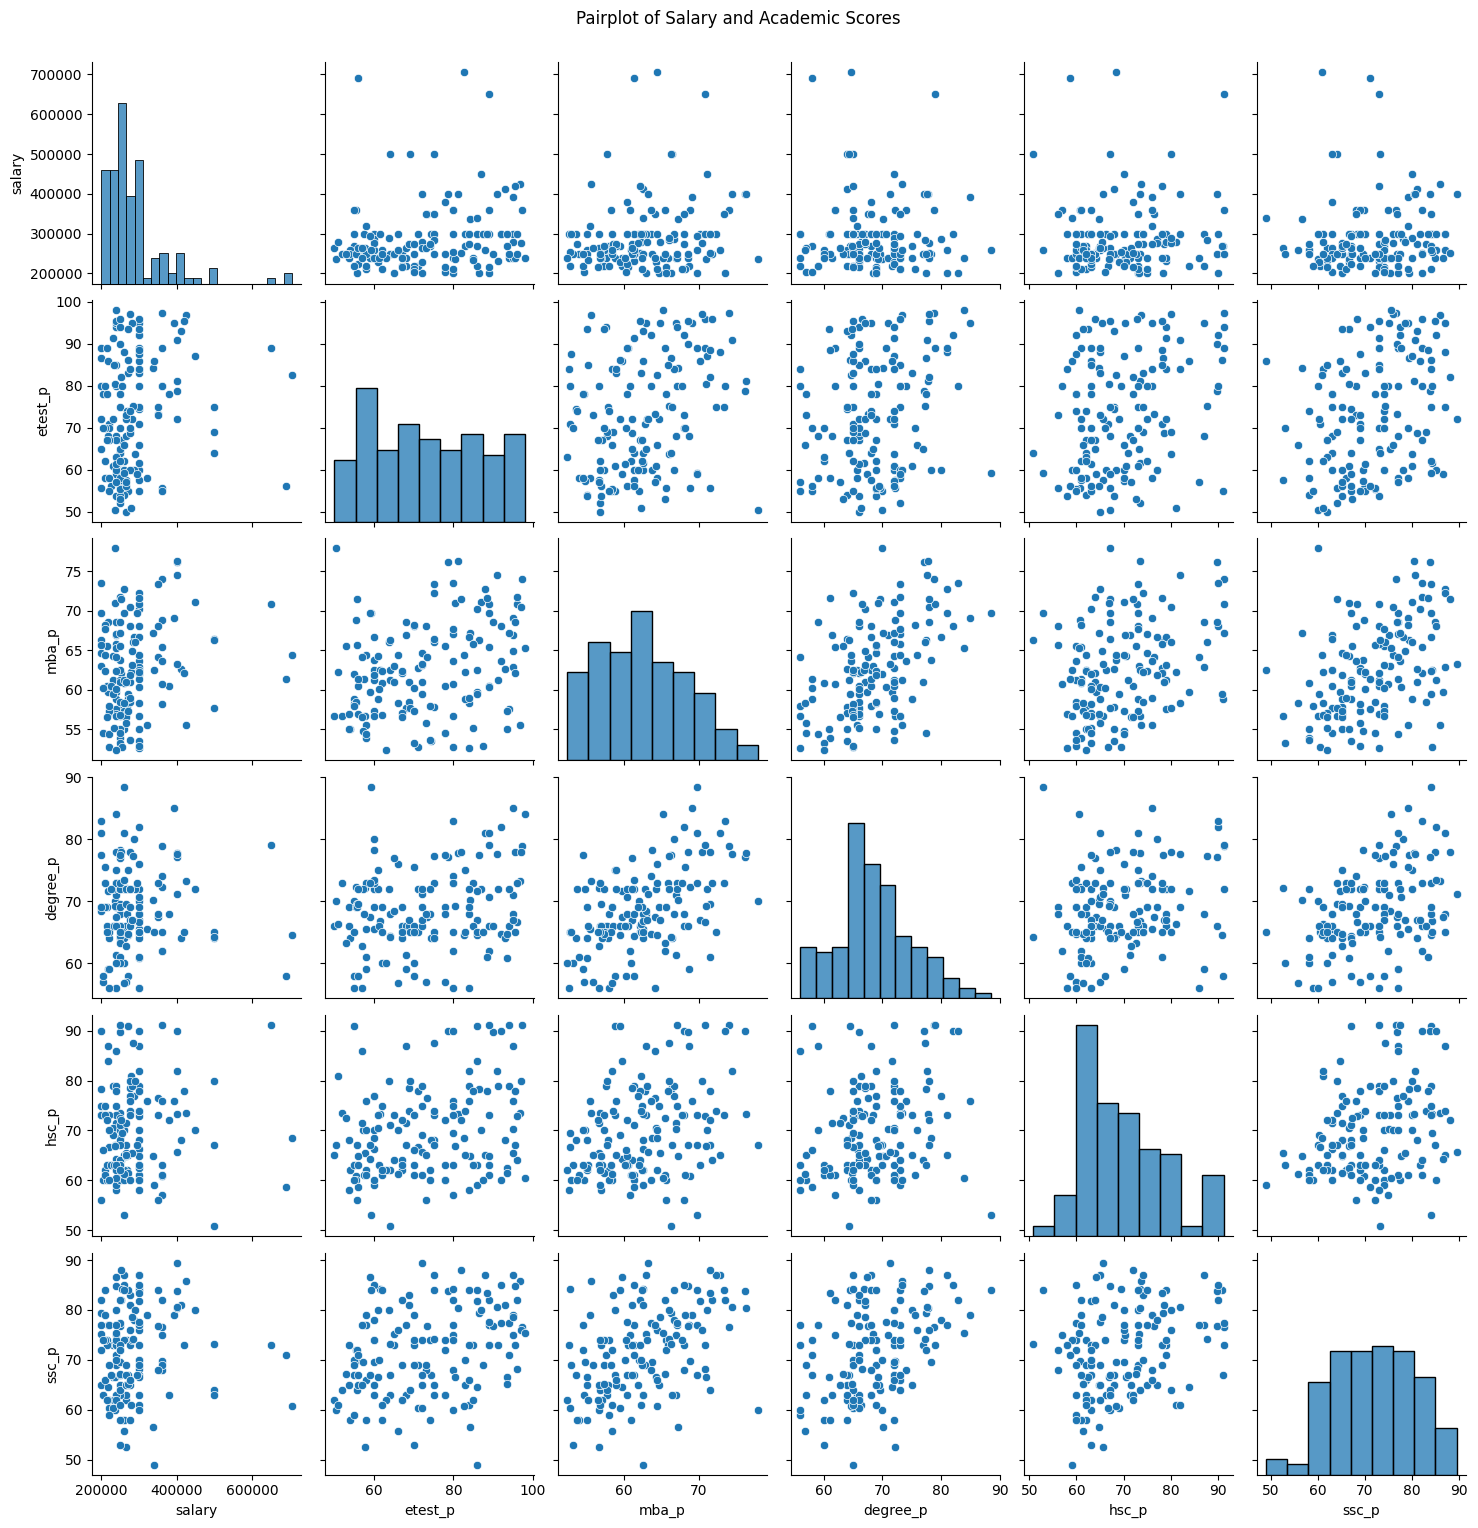

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numeric columns
numeric_cols = placed[['salary', 'etest_p', 'mba_p', 'degree_p', 'hsc_p', 'ssc_p']]

# Plot
sns.pairplot(numeric_cols)
plt.suptitle("Pairplot of Salary and Academic Scores", y=1.02)
plt.show()

In [ ]:
'''
Interpretation of the Pairplot:
    "Pairplot of Salary and Academic Scores"
    This pairplot shows scatter plots and distributions for these variables:
    salary, etest_p, mba_p, degree_p, hsc_p, and ssc_p

Key Observations:
    1. Salary vs Other Variables
        Salary vs MBA% (mba_p):
            Slight positive trend, but weak — matches earlier correlation (≈ 0.18).
        
        Salary vs E-test% (etest_p):
            Also shows a weak positive association.
        
        Salary vs Others (hsc_p, ssc_p, degree_p):
            Mostly scattered randomly — very weak or no relationship.
        
        This confirms earlier correlation results:   
            mba_p and etest_p are more related to salary than other scores.
    
    2. Diagonal Histograms (Distributions):
        Salary is right-skewed — most students earn ~200K–300K, a few earn much more.
        SSC%, HSC%, Degree%, MBA%, and Etest% — all roughly normally distributed, but a few slightly skewed.

    3. Cross Correlations Between Inputs:
        hsc_p and ssc_p show some linear association (students who did well in school also did well in higher secondary).
        Other combinations look random, suggesting low multicollinearity, which is good for ML models.

Final Insight:
    This pairplot confirms that:
        MBA% and E-test% show mild positive influence on salary.
        Other academic scores do not strongly impact salary.
        Salary distribution is skewed, indicating a few high-paying outliers.
        Overall, this plot gives a compact visual summary of relationships and score distributions.
'''